In [242]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundscapy as sspy
from scipy import stats
import rpyskewnorm as snpy
import scipydists as dists
from soundscapy.utils.parameters import PAQ_IDS, LANGUAGE_ANGLES
import circumplex as cx

from utils import spi
import utils

warnings.filterwarnings("ignore")


## Load Data

In [243]:
# Load latest ISD dataset
# data = sspy.isd.load_zenodo()
# Load latest ISD dataset
isd_file = Path("ISD v1.0 Data.csv")

data = pd.read_csv(isd_file)
data, excl_data = sspy.isd.validate(data)
data = data.query("Language != 'cmn'")

# Exclude RegentsParkJapan outliers
# excl_id = list(data.query("LocationID == 'RegentsParkJapan'").query("ISOEventful > 0.72 | ISOEventful < -0.5").index)
# Excluded RegentsParkFields outliers
# excl_id = excl_id + list(data.query("LocationID == 'RegentsParkFields' and ISOPleasant < 0").index) # Helicopters
excl_id = [652, 706, 548, 550, 551, 553, 569, 580, 609, 618, 623, 636, 643]
data.drop(excl_id, inplace=True)

data

Renaming PAQ columns.
Checking PAQ data quality.
Identified 109 samples to remove.
[6, 9, 13, 30, 32, 46, 190, 213, 229, 244, 296, 412, 413, 428, 464, 485, 655, 734, 739, 762, 766, 780, 1067, 1274, 1290, 1316, 1320, 1338, 1346, 1347, 1397, 1425, 1431, 1446, 1447, 1470, 1485, 1491, 1504, 1505, 1510, 1512, 1517, 1522, 1523, 1527, 1599, 1698, 1734, 1817, 1911, 1948, 2069, 2107, 2109, 2111, 2150, 2199, 2277, 2293, 2384, 2386, 2490, 2523, 2584, 2592, 2695, 2762, 2767, 2783, 2789, 2825, 2826, 2832, 2840, 2856, 2859, 2879, 2883, 2889, 2910, 2932, 2956, 2969, 3031, 3058, 3077, 3124, 3149, 3163, 3185, 3202, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3272, 3302, 3365, 3414, 3491, 3502, 3510, 3517, 3533, 3583]


,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,RA_cp90,RA_cp95,THD_THD,THD_Min,THD_Max,THD_L5,THD_L10,THD_L50,THD_L90,THD_L95
0,CarloV,CarloV2,2CV12,1434,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,8.15,6.72,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.00,-10.29
1,CarloV,CarloV2,2CV12,1435,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,8.15,6.72,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.00,-10.29
2,CarloV,CarloV2,2CV13,1430,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,5.00,3.91,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33
3,CarloV,CarloV2,2CV13,1431,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,5.00,3.91,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33
4,CarloV,CarloV2,2CV13,1432,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,5.00,3.91,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Noorderplantsoen,Noorderplantsoen1,NP161,61,2020-03-11 12:42:00,2020-03-11 12:55:00,NaN,NaN,nld,nldSSIDv1,...,2.54,2.00,-3.17,-11.97,59.64,37.87,26.54,6.33,-9.79,-10.34
1694,Noorderplantsoen,Noorderplantsoen1,NP162,63,2020-03-11 12:39:00,2020-03-11 13:00:00,NaN,NaN,nld,nldSSIDv1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1695,Noorderplantsoen,Noorderplantsoen1,NP162,62,2020-03-11 12:54:00,2020-03-11 12:58:00,NaN,NaN,nld,nldSSIDv1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696,Noorderplantsoen,Noorderplantsoen1,NP162,64,2020-03-11 12:56:00,2020-03-11 12:59:00,NaN,NaN,nld,nldSSIDv1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculate ISO Coordinates

### Standard ISO Projection

<Axes: title={'center': 'Soundscapy Density Plot'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

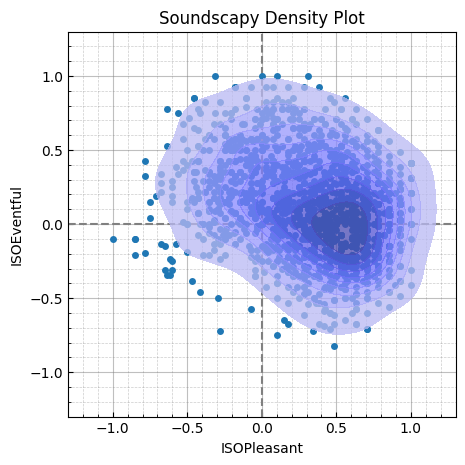

In [304]:
iso_data = data.copy()
iso_data = sspy.surveys.add_iso_coords(iso_data)
sspy.plotting.density(iso_data, xlim=(-1.3, 1.3), ylim=(-1.3, 1.3))

### SATP ISO Projection

Using corrected angles

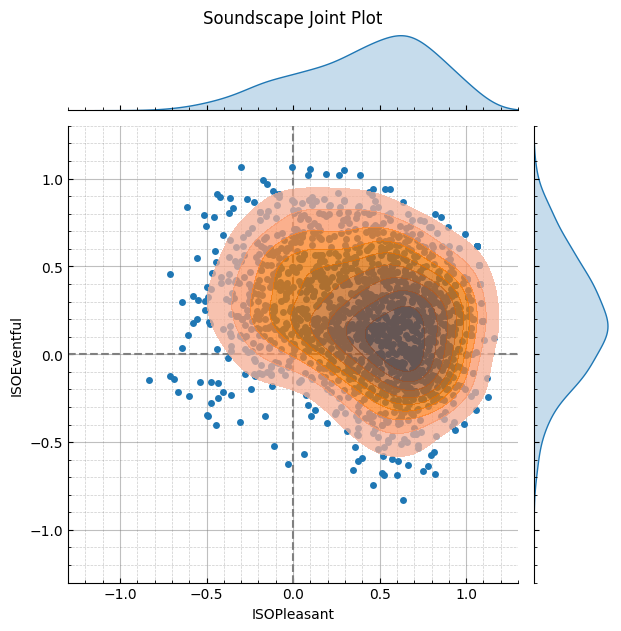

In [306]:
satp_data = data.copy()

for i, row in satp_data.iterrows():
    lang = row['Language']
    angles = LANGUAGE_ANGLES[lang]
    iso_pl, iso_ev = sspy.surveys.adj_iso_pl(row[PAQ_IDS], angles, scale=4), sspy.surveys.adj_iso_ev(row[PAQ_IDS], angles, scale=4)
    satp_data.loc[i, 'ISOPleasant'] = iso_pl
    satp_data.loc[i, 'ISOEventful'] = iso_ev
    
sspy.plotting.jointplot(satp_data, xlim=(-1.3, 1.3), ylim=(-1.3, 1.3))


### SSM Method

In [302]:
def ssm_coords(items: np.array, angles: tuple) -> tuple:
    ssm_params = cx.ssm_parameters(items, angles)
    return ssm_params[1:3]

scale = 0.4

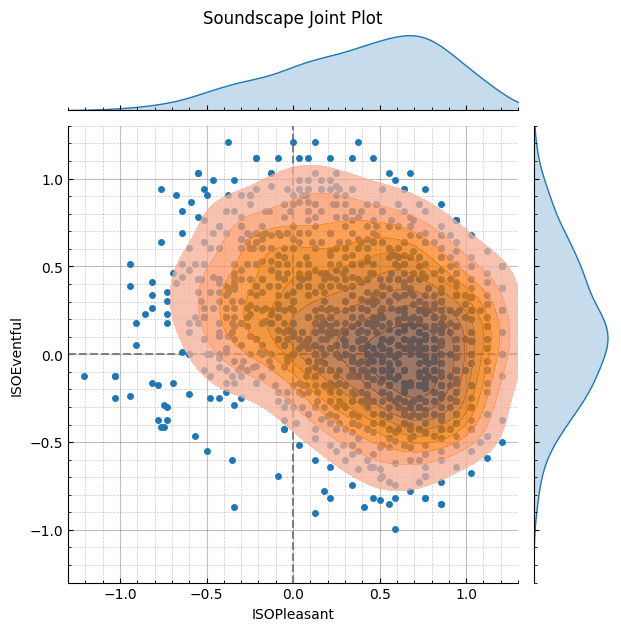

In [303]:
ssm_data = data.copy()
for i, row in ssm_data.iterrows():
    coords = ssm_coords((row[PAQ_IDS] - 3) / 2, angles=cx.OCTANTS)
    ssm_data.loc[i, ['ISOPleasant', 'ISOEventful']] = coords

sspy.plotting.jointplot(ssm_data, xlim=(-1.3, 1.3), ylim=(-1.3, 1.3))

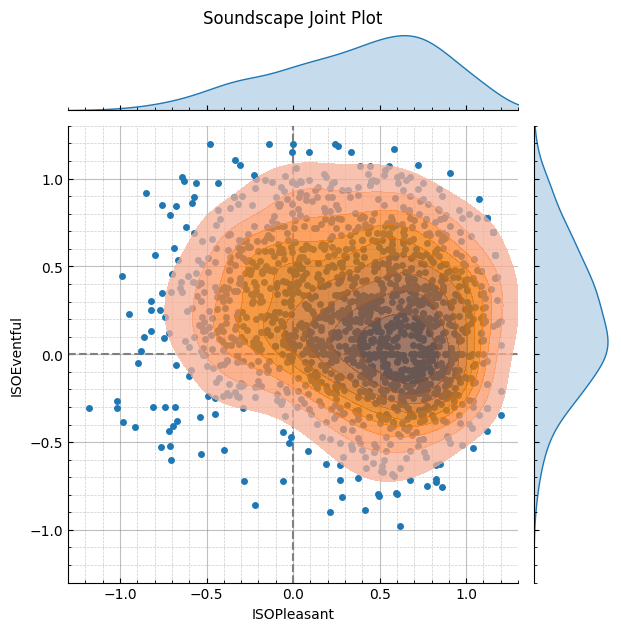

In [308]:
ssm_satp_data = data.copy()

for i, row in ssm_data.iterrows():
    lang = row['Language']
    angles = LANGUAGE_ANGLES[lang]
    coords = ssm_coords((row[PAQ_IDS] - 3) / 2, angles)
    ssm_satp_data.loc[i, ['ISOPleasant', 'ISOEventful']] = coords
# coords = data.apply(lambda x: ssm_coords(x[PAQ_IDS] * scale, LANGUAGE_ANGLES['eng']), axis=1)
# ssm_data[['ISOPleasant', 'ISOPleasant']] = coords

sspy.plotting.jointplot(ssm_satp_data, xlim=(-1.3, 1.3), ylim=(-1.3, 1.3))

## Testing the distribution methods

In [309]:
def try_benchmark(data):
    res = {}
    for location in data.LocationID.unique():
        loc_data = sspy.isd.select_location_ids(data, location)[['ISOPleasant', 'ISOEventful']]
        res[location] = utils.ks2d2s(loc_data, loc_data, extra=True)
    res = pd.DataFrame.from_dict(res, orient='index', columns=["p", "D"])
    return res

def try_msn(data):
    res = {}
    for location in data.LocationID.unique():
        # split out location data
        loc_data = sspy.isd.select_location_ids(data, location)[['ISOPleasant', 'ISOEventful']]
        # fit selm model to get parameters
        try:
            loc_m = snpy.selm("ISOPleasant", "ISOEventful", data=loc_data)
        except:
            print("Error in selm fit for: ", location)
            continue
        try:
            loc_Y = snpy.sample_msn(loc_m, n=1000)
        except:
            print("Error in sample_msn for: ", location)
            continue
           
        loc_Y = pd.DataFrame(loc_Y, columns=['ISOPleasant', 'ISOEventful'])
        res[location] = utils.ks2d2s(loc_data, loc_Y, extra=True)
    res = pd.DataFrame.from_dict(res, orient='index', columns=["p", "D"])
    return res

def try_mtsn(data):
    res = {}
    for location in data.LocationID.unique():
        # split out location data
        loc_data = sspy.isd.select_location_ids(data, location)[['ISOPleasant', 'ISOEventful']]
        # fit selm model to get parameters
        try:
            loc_m = snpy.selm("ISOPleasant", "ISOEventful", data=loc_data)
        except:
            print("Error in selm fit for: ", location)
            continue
        try:
            loc_Y = snpy.sample_mtsn(loc_m, n=1000)
        except:
            print("Error in sample_mtsn for: ", location)
            continue
            
        loc_Y = pd.DataFrame(loc_Y, columns=['ISOPleasant', 'ISOEventful'])
        res[location] = utils.ks2d2s(loc_data, loc_Y, extra=True)
    res = pd.DataFrame.from_dict(res, orient='index', columns=["p", "D"])
    return res


def try_scipy_tsn(data):
    res = {}
    for location in data.LocationID.unique():
        # split out location data
        loc_data = sspy.isd.select_location_ids(data, location)[['ISOPleasant', 'ISOEventful']]
        # fit selm model to get parameters
        loc, scale, alpha = dists.estimate_skew_moments_2d(loc_data[['ISOPleasant', 'ISOEventful']].to_numpy())
        loc_Y = dists.scipy_tsn_2d(loc, scale, alpha, num_samples=1000)            
        loc_Y = pd.DataFrame(loc_Y, columns=['ISOPleasant', 'ISOEventful'])
        res[location] = utils.ks2d2s(loc_data, loc_Y, extra=True)
    res = pd.DataFrame.from_dict(res, orient='index', columns=["p", "D"])
    return res


def try_scipy_msn(data):
    res = {}
    for location in data.LocationID.unique():
        # split out location data
        loc_data = sspy.isd.select_location_ids(data, location)[['ISOPleasant', 'ISOEventful']]
        mean, cov, skew = dists.estimate_msn_moments(
            loc_data[['ISOPleasant', 'ISOEventful']].to_numpy()
            )
        loc_Y = dists.scipy_msn(shape=skew, cov=cov, mean=mean).rvs_slow(1000)
        loc_Y = pd.DataFrame(loc_Y, columns=['ISOPleasant', 'ISOEventful'])
        res[location] = utils.ks2d2s(loc_data, loc_Y, extra=True)
    res = pd.DataFrame.from_dict(res, orient='index', columns=["p", "D"])
    return res


def try_scipy_mn(data):
    res = {}
    for location in data.LocationID.unique():
        # split out location data
        loc_data = sspy.isd.select_location_ids(data, location)[['ISOPleasant', 'ISOEventful']]
        mean, cov, _ = dists.estimate_msn_moments(
            loc_data[['ISOPleasant', 'ISOEventful']].to_numpy()
            )
        loc_Y = dists.scipy_mn(mean, cov, num_samples=1000)
        loc_Y = pd.DataFrame(loc_Y, columns=['ISOPleasant', 'ISOEventful'])
        res[location] = utils.ks2d2s(loc_data, loc_Y, extra=True)
    res = pd.DataFrame.from_dict(res, orient='index', columns=["p", "D"])
    return res

def try_scipy_mtn(data):
    res = {}
    for location in data.LocationID.unique():
        # split out location data
        loc_data = sspy.isd.select_location_ids(data, location)[['ISOPleasant', 'ISOEventful']]
        mean, cov, _ = dists.estimate_msn_moments(
            loc_data[['ISOPleasant', 'ISOEventful']].to_numpy()
            )
        loc_Y = dists.scipy_mtn(mean, cov, num_samples=1000)
        loc_Y = pd.DataFrame(loc_Y, columns=['ISOPleasant', 'ISOEventful'])
        res[location] = utils.ks2d2s(loc_data, loc_Y, extra=True)
    res = pd.DataFrame.from_dict(res, orient='index', columns=["p", "D"])
    return res


def try_scipy_tn(data):
    res = {}
    for location in data.LocationID.unique():
        # split out location data
        loc_data = sspy.isd.select_location_ids(data, location)[['ISOPleasant', 'ISOEventful']]
        mean = loc_data[['ISOPleasant', 'ISOEventful']].mean().to_numpy()
        stddev = loc_data[['ISOPleasant', 'ISOEventful']].std().to_numpy()
        loc_Y = dists.scipy_tn_2d(mean, stddev, num_samples=1000)
        loc_Y = pd.DataFrame(loc_Y, columns=['ISOPleasant', 'ISOEventful'])
        res[location] = utils.ks2d2s(loc_data, loc_Y, extra=True)
    res = pd.DataFrame.from_dict(res, orient='index', columns=["p", "D"])
    return res
    


In [310]:
print("Running benchmarks for ISO")
iso_res = {}
iso_res['benchmark'] = try_benchmark(iso_data)
iso_res['msn'] = try_msn(iso_data)
iso_res['mtsn'] = try_mtsn(iso_data)
iso_res['scipy_mn'] = try_scipy_mn(iso_data)
iso_res['scipy_tn'] = try_scipy_tn(iso_data)
iso_res['scipy_mtn'] = try_scipy_mtn(iso_data)
iso_res['scipy_tsn'] = try_scipy_tsn(iso_data)
iso_res['scipy_msn'] = try_scipy_msn(iso_data)

print("Running benchmarks for SATP")
satp_res = {}
satp_res['benchmark'] = try_benchmark(satp_data)
satp_res['msn'] = try_msn(satp_data)
satp_res['mtsn'] = try_mtsn(satp_data)
satp_res['scipy_mn'] = try_scipy_mn(satp_data)
satp_res['scipy_tn'] = try_scipy_tn(satp_data)
satp_res['scipy_mtn'] = try_scipy_mtn(satp_data)
satp_res['scipy_tsn'] = try_scipy_tsn(satp_data)
satp_res['scipy_msn'] = try_scipy_msn(satp_data)

print("Running benchmarks for SSM")
ssm_res = {}
ssm_res['benchmark'] = try_benchmark(ssm_data)
ssm_res['msn'] = try_msn(ssm_data)
ssm_res['mtsn'] = try_mtsn(ssm_data)
ssm_res['scipy_mn'] = try_scipy_mn(ssm_data)
ssm_res['scipy_tn'] = try_scipy_tn(ssm_data)
ssm_res['scipy_mtn'] = try_scipy_mtn(ssm_data)
ssm_res['scipy_tsn'] = try_scipy_tsn(ssm_data)
ssm_res['scipy_msn'] = try_scipy_msn(ssm_data)

print("Running benchmarks for SSM_SATP")
ssm_satp_res = {}
ssm_satp_res['benchmark'] = try_benchmark(ssm_satp_data)
ssm_satp_res['msn'] = try_msn(ssm_satp_data)
ssm_satp_res['mtsn'] = try_mtsn(ssm_satp_data)
ssm_satp_res['scipy_mn'] = try_scipy_mn(ssm_satp_data)  
ssm_satp_res['scipy_tn'] = try_scipy_tn(ssm_satp_data)
ssm_satp_res['scipy_mtn'] = try_scipy_mtn(ssm_satp_data)
ssm_satp_res['scipy_tsn'] = try_scipy_tsn(ssm_satp_data)
ssm_satp_res['scipy_msn'] = try_scipy_msn(ssm_satp_data)

iso_res = pd.concat(iso_res, axis=1)
satp_res = pd.concat(satp_res, axis=1)
ssm_res = pd.concat(ssm_res, axis=1)
ssm_satp_res = pd.concat(ssm_satp_res, axis=1)



Running benchmarks for ISO


R[write to console]: Error in chol.default(lot$aux$Psi) : 
  the leading minor of order 2 is not positive



Error in sample_msn for:  RegentsParkJapan


R[write to console]: Error in chol.default(lot$aux$Psi) : 
  the leading minor of order 2 is not positive



Error in sample_mtsn for:  RegentsParkJapan
Running benchmarks for SATP
Running benchmarks for SSM
Running benchmarks for SSM_SATP


In [311]:
res = pd.DataFrame({
    "iso": iso_res.mean(),
    "satp": satp_res.mean(),
    "ssm": ssm_res.mean(),
    "ssm_satp": ssm_satp_res.mean()
})
res

iso      satp       ssm  ssm_satp
benchmark p  1.000000  1.000000  1.000000  1.000000
          D  0.015185  0.015185  0.015185  0.015185
msn       p  0.465357  0.562509  0.486952  0.456373
          D  0.118309  0.109810  0.116221  0.119853
mtsn      p  0.433930  0.442268  0.229574  0.239475
          D  0.122008  0.126246  0.164551  0.158554
scipy_mn  p  0.305868  0.349701  0.349431  0.360433
          D  0.138710  0.134823  0.133068  0.132576
scipy_tn  p  0.003758  0.006717  0.004066  0.001909
          D  0.325064  0.315896  0.321632  0.326232
scipy_mtn p  0.279799  0.263552  0.123244  0.186736
          D  0.148024  0.158660  0.197856  0.180046
scipy_tsn p  0.376730  0.352066  0.236838  0.329696
          D  0.127551  0.135906  0.163057  0.144473
scipy_msn p  0.176612  0.222497  0.129377  0.183064
          D  0.191251  0.184408  0.207325  0.198188

In [301]:
ssm_satp_res

benchmark                 msn                mtsn  \
                           p         D         p         D         p   
CarloV                   1.0  0.008621  0.332220  0.108948  0.415114   
SanMarco                 1.0  0.010526  0.187876  0.136500  0.124164   
PlazaBibRambla           1.0  0.055556  0.386987  0.230389  0.408058   
CamdenTown               1.0  0.009524  0.554649  0.095452  0.123191   
EustonTap                1.0  0.010417  0.539653  0.100333  0.214952   
Noorderplantsoen         1.0  0.010309  0.028382  0.181284  0.024192   
MarchmontGarden          1.0  0.009615  0.391306  0.108846  0.085582   
MonumentoGaribaldi       1.0  0.031250  0.416390  0.176875  0.551950   
TateModern               1.0  0.006579  0.047374  0.140842  0.085713   
PancrasLock              1.0  0.010753  0.053461  0.170430  0.048089   
TorringtonSq             1.0  0.008850  0.752887  0.078704  0.504059   
RegentsParkFields        1.0  0.009346  0.038338  0.167808  0.024889   
RegentsParkJapan         1.0  0.011236  0.007564  0.215112  0.003696   
RussellSq                1.0  0.006897  0.539724  0.084397  0.215597   
StPaulsCross             1.0  0.015152  0.559008  0.115697  0.385705   
StPaulsRow               1.0  0.013889  0.754768  0.095167  0.470160   
CampoPrincipe            1.0  0.009091  0.435522  0.102636  0.128669   
MiradorSanNicolas        1.0  0.035714  0.545286  0.168857  0.621139   

                              scipy_mn                scipy_tn            \
                           D         p         D             p         D   
CarloV              0.101862  0.138097  0.133224  2.205885e-08  0.348931   
SanMarco            0.147947  0.571675  0.098316  5.307215e-07  0.345447   
PlazaBibRambla      0.226556  0.375052  0.232667  2.386168e-02  0.379222   
CamdenTown          0.142024  0.321463  0.114833  6.329528e-07  0.329119   
EustonTap           0.131958  0.405129  0.111375  8.278754e-08  0.364375   
Noorderplantsoen    0.184820  0.065612  0.162593  3.865498e-08  0.370784   
MarchmontGarden     0.151615  0.215849  0.127423  3.223722e-06  0.311962   
MonumentoGaribaldi  0.159125  0.603720  0.153000  2.595158e-03  0.365125   
TateModern          0.129211  0.174530  0.113526  2.649091e-09  0.329184   
PancrasLock         0.172914  0.370769  0.116011  2.052490e-06  0.332586   
TorringtonSq        0.096230  0.479924  0.098049  4.646734e-07  0.322407   
RegentsParkFields   0.176734  0.033875  0.170421  1.035844e-08  0.368654   
RegentsParkJapan    0.228556  0.008117  0.213657  7.924505e-06  0.321528   
RussellSq           0.110931  0.066730  0.137086  2.423797e-09  0.336862   
StPaulsCross        0.132667  0.265800  0.146939  6.053659e-05  0.334379   
StPaulsRow          0.119667  0.581053  0.109833  5.848892e-06  0.356722   
CampoPrincipe       0.138136  0.024154  0.175318  3.653703e-05  0.275545   
MiradorSanNicolas   0.159143  0.506720  0.173786  1.879414e-03  0.394929   

                   scipy_mtn           scipy_tsn               scipy_msn  \
                           p         D         p         D             p   
CarloV              0.008025  0.191466  0.212666  0.122017  2.190545e-04   
SanMarco            0.080655  0.159026  0.224133  0.131289  2.340935e-01   
PlazaBibRambla      0.264264  0.256222  0.692309  0.181278  2.622090e-02   
CamdenTown          0.162824  0.134690  0.111287  0.144571  1.885080e-01   
EustonTap           0.454078  0.107167  0.276429  0.124250  3.744412e-01   
Noorderplantsoen    0.001203  0.239593  0.393434  0.111918  1.359523e-04   
MarchmontGarden     0.022484  0.180962  0.572758  0.094538  2.035562e-03   
MonumentoGaribaldi  0.440012  0.173625  0.397052  0.179625  1.651685e-01   
TateModern          0.021713  0.154737  0.311808  0.099158  6.014070e-02   
PancrasLock         0.100386  0.154882  0.121358  0.149919  1.956629e-02   
TorringtonSq        0.544874  0.093279  0.521719  0.094951  3.435695e-01   
RegentsParkFields   0.000144  0.260575  0.007505  0.199463  2.905367e

---

## Usage Examples

In [87]:
test_data = sspy.isd.select_location_ids(data, 'RegentsParkJapan')


In [88]:
import rpyskewnorm as snpy

m = snpy.selm(
    x = "ISOPleasant",
    y = "ISOEventful",
    data = test_data,
    )

cp = snpy.extract_cp(m)
dp = snpy.extract_dp(m)
print(f"mean: {cp[0]}")
print(f"cov: {cp[1]}")
print(f"skew: {cp[2]}")

print("\n")
print(f"xi: {dp[0]}")
print(f"omega: {dp[1]}")
print(f"alpha: {dp[2]}")

mean: [[0.76569249 0.1337267 ]]
cov: [[0.05304569 0.01325881]
 [0.01325881 0.06333638]]
skew: [-0.99252395 -0.00648337]


xi: [[1.07026046 0.19593844]]
omega: [[0.14580734 0.03220651]
 [0.03220651 0.06720668]]
alpha: [-31277540.37912534    848852.67981869]


IndexError: tuple index out of range

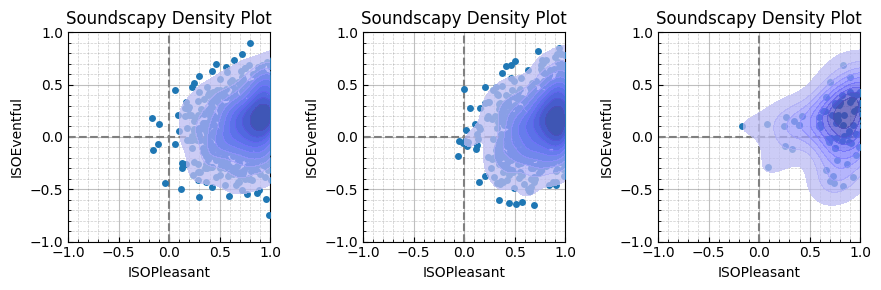

In [89]:
Y1 = snpy.sample_msn(xi = dp[0], omega=dp[1], alpha=dp[2], n=1000)
Y1 = pd.DataFrame(Y1, columns=['ISOPleasant', 'ISOEventful'])

Y2 = snpy.sample_msn(m, n=1000)
Y2 = pd.DataFrame(Y2, columns=['ISOPleasant', 'ISOEventful'])

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
sspy.plotting.density(Y1, ax=axes[0])
sspy.plotting.density(Y2, ax=axes[1])
sspy.plotting.density(test_data, ax=axes[2])
plt.tight_layout()

print(spi(test_data[['ISOPleasant', 'ISOEventful']], Y1))
print(spi(test_data[['ISOPleasant', 'ISOEventful']], Y2))
print(spi(Y1, Y2))



IndexError: tuple index out of range

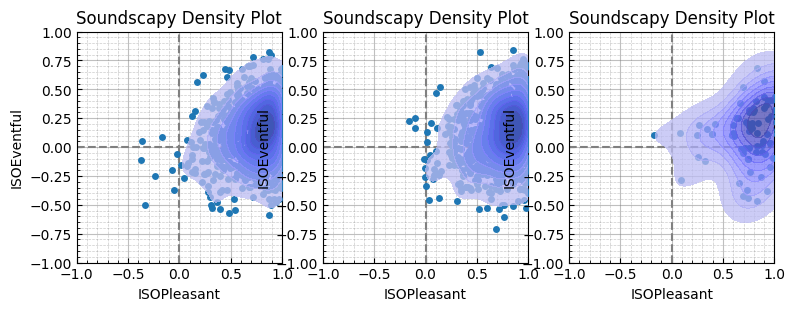

In [90]:
Yt1 = snpy.sample_mtsn(m, n=1000)
Yt1 = pd.DataFrame(Yt1, columns=['ISOPleasant', 'ISOEventful'])

Yt2 = snpy.sample_mtsn(xi = dp[0], omega=dp[1], alpha=dp[2], n=1000)
Yt2 = pd.DataFrame(Yt2, columns=['ISOPleasant', 'ISOEventful'])

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
sspy.plotting.density(Yt1, ax=axes[0])
sspy.plotting.density(Yt2, ax=axes[1])
sspy.plotting.density(test_data, ax=axes[2])

print(spi(test_data[['ISOPleasant', 'ISOEventful']], Yt1))
print(spi(test_data[['ISOPleasant', 'ISOEventful']], Yt2))
print(spi(Yt1, Yt2))


options explored:

Multivariate Truncated Normal:

- trun_mvnt: https://github.com/ralphma1203/trun_mvnt?tab=readme-ov-file
- StackOverflow: https://stackoverflow.com/questions/20115917/truncated-multivariate-normal-in-scipy

Univariate Skew Normal:
- http://azzalini.stat.unipd.it/SN/Intro/intro.html

# Truncated Skew-Normal

In [566]:
# draw a sample
def truncated_skew_normal(loc: float, scale: float, skew: float, a: float = -1, b: float = 1, num_samples: int = 1000):
    # Parameters for the skew-normal distribution
    # delta = skew / np.sqrt(1 + skew**2)
    # delta = skew
    # Rejection sampling
    samples = []
    while len(samples) < num_samples:
        candidate = stats.skewnorm.rvs(a=skew, loc=loc, scale=scale)
        if a <= candidate <= b:
            samples.append(candidate)
    return np.array(samples)


def estimate_skew_moments(samples: np.array):
    skew, loc, scale = stats.skewnorm.fit(samples)
    return loc, scale, skew


def trunc_skewnorm_2d(loc: tuple, scale: tuple, skew: tuple, a: tuple = (-1, -1), b: tuple = (1, 1), num_samples=1000):
    samples = np.array(
            [
                truncated_skew_normal(loc[0], scale[0], skew[0], a[0], b[0], num_samples),
                truncated_skew_normal(loc[1], scale[1], skew[1], a[1], b[1], num_samples)
                ]
            ).T
    return samples


def estimate_skew_moments_2d(samples: np.array):
    loc_0, scale_0, skew_0 = estimate_skew_moments(samples[:, 0])
    loc_1, scale_1, skew_1 = estimate_skew_moments(samples[:, 1])
    return (loc_0, loc_1), (scale_0, scale_1), (skew_0, skew_1)


Note that the location, scale, and skew/shape parameters (referred to as 'direct parameters' by Azzalini) are distinct from the mean, covariance, and skewness parameters (referred to as 'centred parameters'). http://azzalini.stat.unipd.it/SN/Intro/intro.html

(0.8186226102942695, 0.6859803261389701, -4.20548006334138)


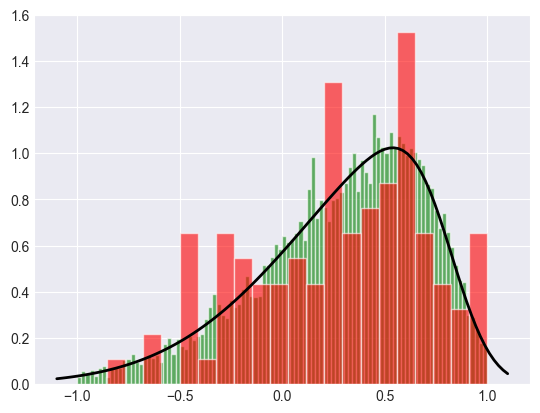

In [567]:
0# loc_s, scale_s, skew_s = (0.377, 0.0827, -0.083)
# print((loc_s, scale_s, skew_s))
# s_data = truncated_skew_normal(loc_s, scale_s, skew_s, num_samples=10000)
s_data = test_data['ISOPleasant'].to_numpy()
loc_p, scale_p, skew_p = estimate_skew_moments(s_data)
p_data = truncated_skew_normal(loc_p, scale_p, skew_p, num_samples=10000)
print((loc_p, scale_p, skew_p))

# plot the pdfs
plt.figure()
plt.hist(p_data, bins=100, density=True, alpha=0.6, color='g')
plt.hist(s_data, bins=21, density=True, alpha=0.6, color='r')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x, skew_p, loc_p, scale_p)
plt.plot(x, p, 'k', linewidth=2)

In [568]:
targets = estimate_skew_moments_2d(test_data[['ISOPleasant', 'ISOEventful']].to_numpy())
print(targets)
p_data = trunc_skewnorm_2d(targets[0], targets[1], targets[2], num_samples=10000)
sample_moments = estimate_skew_moments_2d(p_data)
print(sample_moments)

((0.8186226102942695, -0.33616237140375016), (0.6859803261389701, 0.39567973474924745), (-4.20548006334138, 3.116395598533704))
((0.8128313333487476, -0.33028171176693866), (0.6663039964642805, 0.3877676207947591), (-5.155976610981078, 2.9096536098316017))


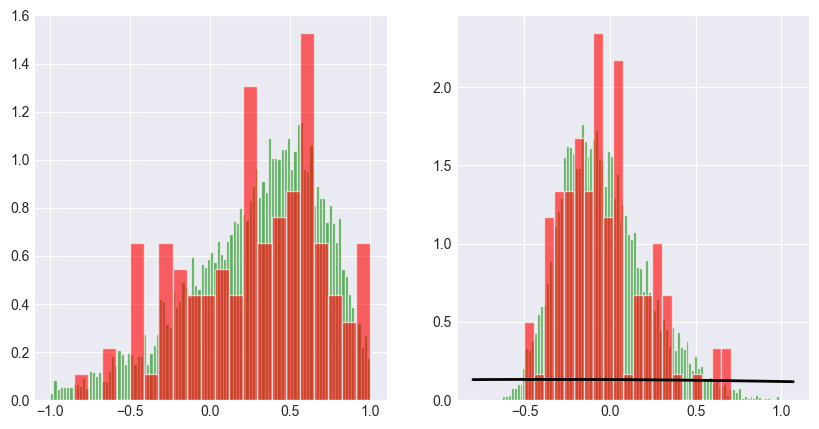

In [569]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(p_data[:, 0], bins=100, density=True, alpha=0.6, color='g')
axes[0].hist(test_data['ISOPleasant'], bins=21, density=True, alpha=0.6, color='r')
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x, targets[0][0], targets[1][0], targets[2][0])
axes[0].plot(x, p, 'k', linewidth=2)

axes[1].hist(p_data[:, 1], bins=100, density=True, alpha=0.6, color='g')
axes[1].hist(test_data['ISOEventful'], bins=21, density=True, alpha=0.6, color='r')
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x, targets[0][1], targets[1][1], targets[2][1])
axes[1].plot(x, p, 'k', linewidth=2)

plt.show()

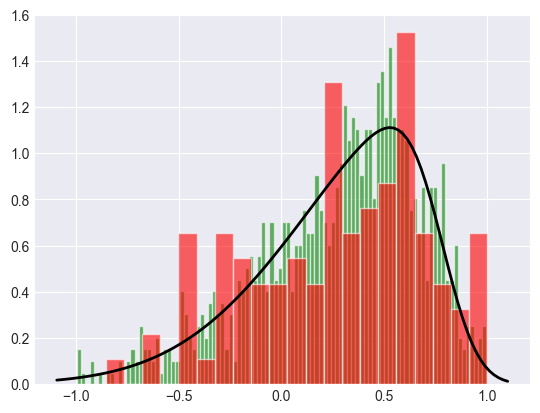

In [570]:
a, loc, scale = stats.skewnorm.fit(test_data['ISOPleasant'])

p_data = truncated_skew_normal(loc, scale, a, -1, 1, num_samples=1000)

# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(p_data)

# plot the pdfs
plt.figure()
plt.hist(p_data, bins=100, density=True, alpha=0.6, color='g')
plt.hist(test_data['ISOPleasant'], bins=21, density=True, alpha=0.6, color='r')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x, ae, loce, scalee)
plt.plot(x, p, 'k', linewidth=2)

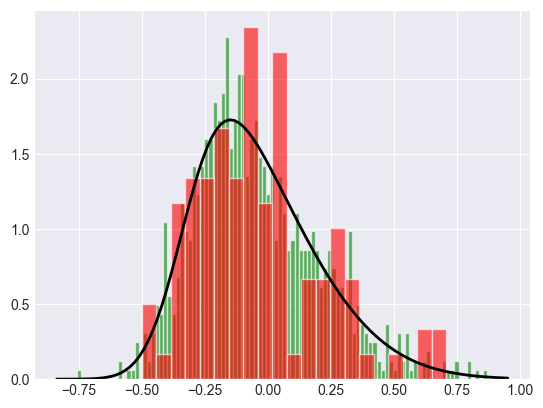

In [571]:
a, loc, scale = stats.skewnorm.fit(test_data['ISOEventful'])

e_data = truncated_skew_normal(loc, scale, a, -1, 1, num_samples=1000)

# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(e_data)

# plot the pdfs
plt.figure()
plt.hist(e_data, bins=100, density=True, alpha=0.6, color='g')
plt.hist(test_data['ISOEventful'], bins=21, density=True, alpha=0.6, color='r')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x, ae, loce, scalee)
plt.plot(x, p, 'k', linewidth=2)

In [572]:
from utils import spi

target_data = pd.DataFrame(
        {
            'ISOPleasant': p_data,
            'ISOEventful': e_data
            }
        )

spi(test_data[['ISOPleasant', 'ISOEventful']], target_data)

86

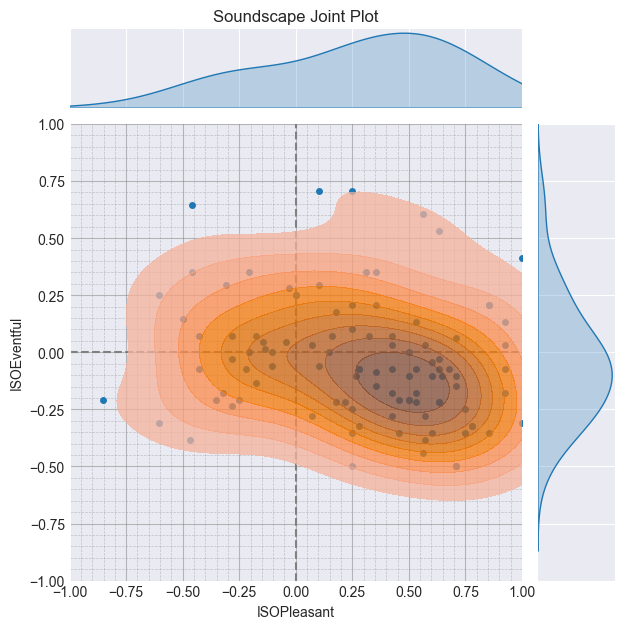

In [573]:
sspy.plotting.jointplot(test_data)

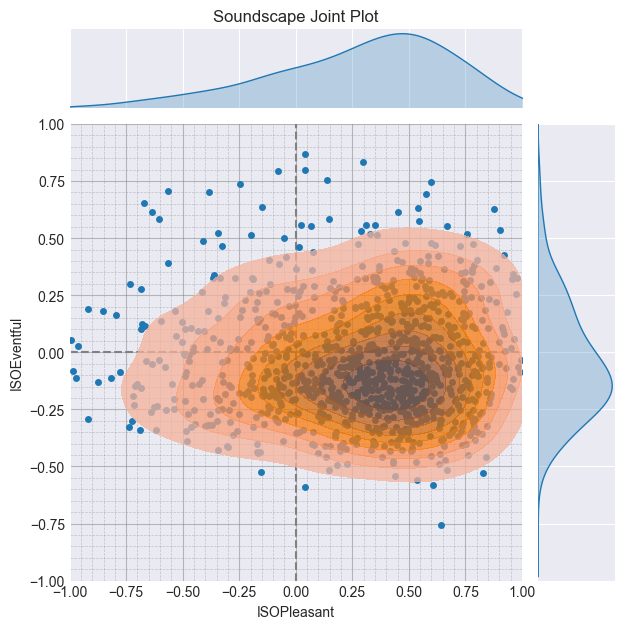

In [574]:
sspy.plotting.jointplot(target_data)

In [575]:
spi(sspy.isd.select_location_ids(data, 'SanMarco'), target_data)


43

# Multivariate Skew-Normal

In [576]:


import numpy as np
from scipy.stats import (multivariate_normal as mvn,
                         norm
                         )
from scipy.stats._multivariate import _squeeze_output


class multivariate_skewnorm:
    # from: https://gregorygundersen.com/blog/2020/12/29/multivariate-skew-normal/
    def __init__(self, shape, mean=(0, 0), cov=None):
        self.dim = len(shape)
        self.shape = np.asarray(shape)
        self.mean = np.asarray(mean)
        self.cov = np.eye(self.dim) if cov is None else np.asarray(cov)

    def pdf(self, x):
        return np.exp(self.logpdf(x))

    def logpdf(self, x):
        x = mvn._process_quantiles(x, self.dim)
        pdf = mvn(self.mean, self.cov).logpdf(x)
        cdf = norm(0, 1).logcdf(np.dot(x, self.shape))
        return _squeeze_output(np.log(2) + pdf + cdf)

    def rvs_slow(self, size=1):
        # K-variate normal density
        std_mvn = mvn(self.mean,
                      self.cov
                      )
        x = np.empty((size, self.dim))

        # Apply rejection sampling.
        n_samples = 0
        while n_samples < size:
            z = std_mvn.rvs(size=1)
            u = np.random.uniform(0, 2 * std_mvn.pdf(z))
            if not u > self.pdf(z):
                x[n_samples] = z
                n_samples += 1

        # Rescale based on correlation matrix.
        # chol = np.linalg.cholesky(self.cov)
        # x = (chol @ x.T).T

        return x

    def rvs_fast(self, size=1):
        aCa = self.shape @ self.cov @ self.shape
        delta = (1 / np.sqrt(1 + aCa)) * self.cov @ self.shape
        cov_star = np.block([[np.ones(1), delta],
                             [delta[:, None], self.cov]]
                            )
        x = mvn(np.zeros(self.dim + 1), cov_star).rvs(size)
        x0, x1 = x[:, 0], x[:, 1:]
        inds = x0 <= 0
        x1[inds] = -1 * x1[inds]
        return x1


def estimate_moments(samples):
    # Calculate sample mean
    sample_mean = np.mean(samples, axis=0)

    # Calculate sample covariance matrix
    sample_cov_matrix = np.cov(samples, rowvar=False)

    # Center the samples
    centered_samples = samples - sample_mean

    # Calculate skewness matrix using the centered samples
    skewness_matrix = np.mean(centered_samples ** 3, axis=0) / np.std(centered_samples, axis=0) ** 3

    return sample_mean, sample_cov_matrix, skewness_matrix


Estimated Mean: [ 0.27909904 -0.03652308]
Estimated Covariance Matrix:
[[ 0.18122578 -0.02137291]
 [-0.02137291  0.06742474]]
Estimated Skewness: [-0.45149117  0.73468857]


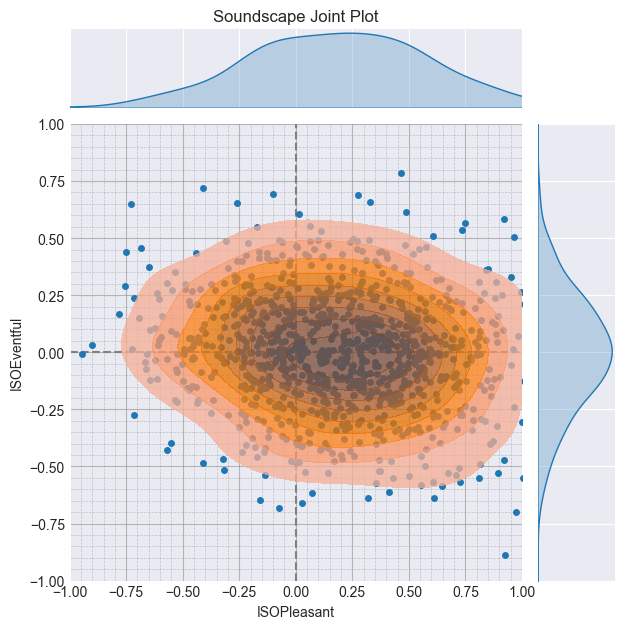

In [577]:
estimated_mean, estimated_cov_matrix, estimated_skewness = estimate_moments(
    test_data[['ISOPleasant', 'ISOEventful']].to_numpy()
    )

print("Estimated Mean:", estimated_mean)
print("Estimated Covariance Matrix:")
print(estimated_cov_matrix)
print("Estimated Skewness:", estimated_skewness)

targets = {
    'mean': (0.224, 0.377),
    'cov' : np.array([[0.099, -0.018], [-0.0183, 0.0827]]),
    'skew': (0.089, -0.083)
    }

test_df = multivariate_skewnorm(shape=estimated_skewness, cov=estimated_cov_matrix, mean=estimated_mean).rvs_slow(1000)
# test_df = multivariate_skewnorm(shape=targets['skew'], cov=targets['cov'], mean=targets['mean']).rvs_slow(1000)

test_df = pd.DataFrame(test_df, columns=['ISOPleasant', 'ISOEventful'])

sspy.plotting.jointplot(test_df)

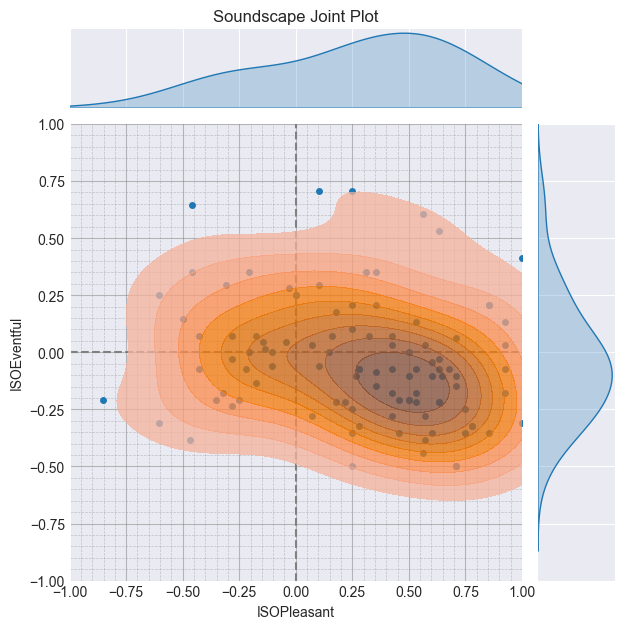

In [578]:
sspy.plotting.jointplot(test_data)

In [579]:
spi(sspy.isd.select_location_ids(data, 'SanMarco'), test_df)

46

## R SN

In [5]:
import rpyskewnorm as snpy

sigma = np.array([[1, 0.4], [0.4, 0.6]])
mean = (0, -1)
skew = (0, -0.6)
beta, omega, alpha = snpy.skewnormal_parms_2d(mean, sigma, skew)
print(beta, omega, alpha)
y = snpy.rnd_skewnormal_2d(beta, omega, alpha, size=20)

[ 0.         -0.13389297] [[1.         0.4       ]
 [0.4        1.35014139]] [  3.66054584 -10.63348162]


NameError: name 'mean' is not defined

-0.03652307692307693 0.2596627369069606 0.745484116696089
-0.3486524345620716 0.4060165918261776 3.598957128011734


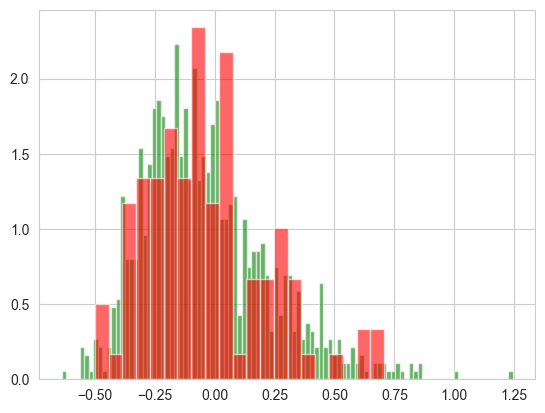

In [6]:
mean = test_data['ISOEventful'].mean()
std = test_data['ISOEventful'].std()
skew = test_data['ISOEventful'].skew()
print(mean, std, skew)

beta, omega, alpha = snpy.skewnormal_parms(mean, std, skew)
print(beta, omega, alpha)
y = snpy.rnd_skewnormal(beta, omega, alpha, size=1000)

# plot the pdfs
plt.figure()
plt.hist(y, bins=100, density=True, alpha=0.6, color='g')
plt.hist(test_data['ISOEventful'], bins=21, density=True, alpha=0.6, color='r')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.show()

## End


In [203]:
import numpy as np


def multivariate_skew_normal(mean, cov_matrix, skewness, size=1):
    dim = len(mean)

    # Generate samples from the multivariate normal distribution
    normal_samples = multivariate_normal.rvs(mean=mean, cov=cov_matrix, size=size)

    # Generate samples from the skewness distribution
    skew_samples = skewnorm.rvs(skewness, size=(size, dim))

    # Combine the normal samples and skew samples
    skewed_samples = normal_samples + skew_samples

    return skewed_samples


# Example usage:
mean_vector = np.array([1, 0])
covariance_matrix = np.array([[1, 0.9], [0.9, 1]])
skewness_parameter = 2

samples = multivariate_skew_normal(mean_vector, covariance_matrix, skewness_parameter, size=1000)

print("Sample Mean:", np.mean(samples, axis=0))
print("Sample Covariance Matrix:")
print(np.cov(samples, rowvar=False))


Sample Mean: [1.70380847 0.66459427]
Sample Covariance Matrix:
[[1.55894132 0.93562762]
 [0.93562762 1.54235095]]


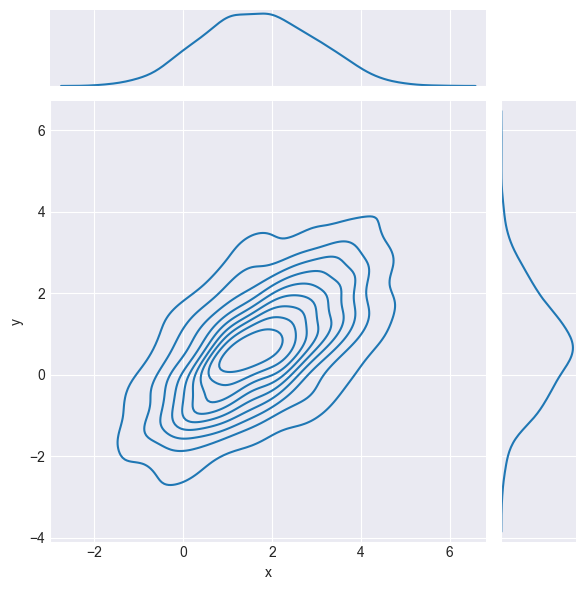

In [204]:
test_df = pd.DataFrame(samples, columns=['x', 'y'])
sns.jointplot(data=test_df, x='x', y='y', kind='kde')

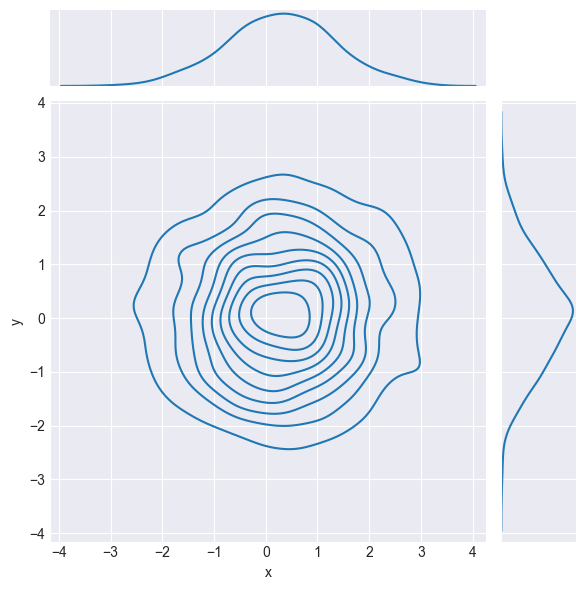

In [209]:
samples = multivariate_skew_normal(
        mean=test_data[['ISOPleasant', 'ISOEventful']].mean().to_numpy(),
        cov_matrix=test_data[['ISOPleasant', 'ISOEventful']].cov().to_numpy(),
        skewness=0,
        size=1000
        )

samples = pd.DataFrame(samples, columns=['x', 'y'])
sns.jointplot(data=samples, x='x', y='y', kind='kde')

In [213]:
import numpy as np
from scipy.stats import multivariate_normal, skewnorm
from scipy.optimize import minimize


def fit_multivariate_skew_normal(samples):
    dim = samples.shape[1]

    # Function to minimize (negative log-likelihood)
    def negative_log_likelihood(params):
        mean = params[:dim]
        cov_matrix = np.diag(np.exp(params[dim:2 * dim]))
        skewness = params[2 * dim:]

        # Calculate log-likelihood
        normal_density = multivariate_normal.logpdf(samples, mean=mean, cov=cov_matrix)
        skew_density = skewnorm.logpdf((samples - mean) / np.sqrt(np.diag(cov_matrix)), skewness)

        return -np.sum(normal_density + skew_density)

    # Initial guess for parameters
    initial_params = np.concatenate(
            [samples.mean(axis=0), np.log(np.diag(np.cov(samples, rowvar=False))), np.zeros(dim)]
            )

    # Optimize the negative log-likelihood
    result = minimize(negative_log_likelihood, initial_params, method='L-BFGS-B')

    # Extract parameters from the optimized result
    fitted_mean = result.x[:dim]
    fitted_cov_matrix = np.diag(np.exp(result.x[dim:2 * dim]))
    fitted_skewness = result.x[2 * dim:]

    return fitted_mean, fitted_cov_matrix, fitted_skewness


# Example usage:
# Assume 'data' is a 2D array of samples
data = np.random.multivariate_normal(mean=[2, 3], cov=[[1, 0.5], [0.5, 2]], size=1000)
fit_mean, fit_cov_matrix, fit_skewness = fit_multivariate_skew_normal(data)

print("Fitted Mean:", fit_mean)
print("Fitted Covariance Matrix:")
print(fit_cov_matrix)
print("Fitted Skewness:", fit_skewness)



ValueError: operands could not be broadcast together with shapes (1000,) (1000,2) 

In [233]:
sample = multivariate_normal.rvs([2, 3], [[1, 0.5], [0.5, 2]]) + skewnorm.rvs([2, -1])
sample[0] < 1 and sample[1] < 1 and sample[0] > -1 and sample[1] > -1

True

In [298]:
import numpy as np
from scipy.stats import multivariate_normal, skewnorm


def sample_bivariate_skew_normal(size, location, covariance, skewness, a=-1, b=1):
    # Rejection sampling
    samples = []
    while len(samples) < size:
        candidate = multivariate_normal.rvs(mean=location, cov=covariance) * skewnorm.rvs(skewness)
        if a <= candidate[0] <= b and a <= candidate[1] <= b:
            samples.append(candidate)

    return samples


# Example usage:
size = 1000
location = [0.5, -0.5]
covariance = [[1, 0.5], [0.5, 2]]
skewness = [2, -1]

samples = sample_bivariate_skew_normal(size, location, covariance, skewness)

# Print mean and covariance matrix of the generated samples
print("Sample Mean:", np.mean(samples, axis=0))
print("Sample Covariance Matrix:")
print(np.cov(samples, rowvar=False))


Sample Mean: [0.09059921 0.0597697 ]
Sample Covariance Matrix:
[[ 0.1769003  -0.00457141]
 [-0.00457141  0.20086224]]


In [299]:
import numpy as np


def estimate_moments(samples):
    # Calculate sample mean
    sample_mean = np.mean(samples, axis=0)

    # Calculate sample covariance matrix
    sample_cov_matrix = np.cov(samples, rowvar=False)

    # Center the samples
    centered_samples = samples - sample_mean

    # Calculate skewness matrix using the centered samples
    skewness_matrix = np.mean(centered_samples ** 3, axis=0) / np.std(centered_samples, axis=0) ** 3

    return sample_mean, sample_cov_matrix, skewness_matrix


# Example usage:
# Assume 'data' is a 2D array of samples
data = np.random.multivariate_normal(mean=[0.5, -0.5], cov=[[1, 0.5], [0.5, 2]], size=1000)

# Estimate moments
estimated_mean, estimated_cov_matrix, estimated_skewness = estimate_moments(data)

print("Estimated Mean:", estimated_mean)
print("Estimated Covariance Matrix:")
print(estimated_cov_matrix)
print("Estimated Skewness:", estimated_skewness)


Estimated Mean: [ 0.43266242 -0.56365521]
Estimated Covariance Matrix:
[[1.01840587 0.47906665]
 [0.47906665 1.90171325]]
Estimated Skewness: [0.04232562 0.19124746]


In [300]:
estimated_mean, estimated_cov_matrix, estimated_skewness = estimate_moments(
    test_data[['ISOPleasant', 'ISOEventful']].to_numpy()
    )

print("Estimated Mean:", estimated_mean)
print("Estimated Covariance Matrix:")
print(estimated_cov_matrix)
print("Estimated Skewness:", estimated_skewness)


Estimated Mean: [0.25715484 0.07943226]
Estimated Covariance Matrix:
[[ 0.15379664 -0.02063052]
 [-0.02063052  0.08202177]]
Estimated Skewness: [-0.36778486 -0.40921456]


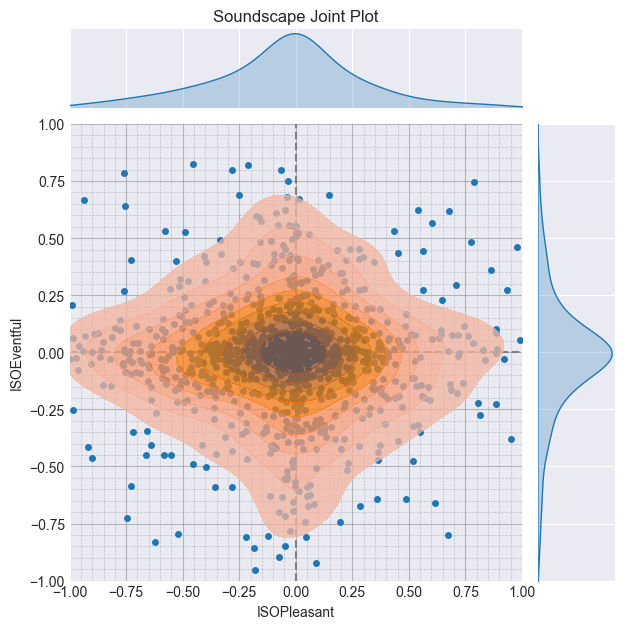

In [301]:
data = sample_bivariate_skew_normal(location=estimated_mean, covariance=estimated_cov_matrix,
                                    skewness=estimated_skewness, size=1000
                                    )

data = pd.DataFrame(data, columns=['ISOPleasant', 'ISOEventful'])

sspy.plotting.jointplot(data)

In [302]:
data

,ISOPleasant,ISOEventful
0,0.273049,0.076969
1,0.302629,-0.203748
2,-0.463852,-0.063422
3,-0.121700,-0.037437
4,-0.576033,-0.138067
...,...,...
995,0.030473,0.245347
996,0.011258,-0.212560
997,-0.180243,-0.952178
998,-0.151068,0.062439
